<a href="https://colab.research.google.com/github/dajebbar/Diabetes-Classification/blob/main/Multicollinearity_and_VIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multicollinearity & VIF(Variance Inflation Factor)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
diabetes_df = pd.read_csv('./diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Prepare Data

In [3]:
def zero_check(df):
  features_list = df.columns[:-1].tolist()
  for feature in features_list:
    print(f'No of zeros in {feature} : {df[df[feature] <= 0].shape[0]}')

In [4]:
zero_check(diabetes_df)

No of zeros in Pregnancies : 111
No of zeros in Glucose : 5
No of zeros in BloodPressure : 35
No of zeros in SkinThickness : 227
No of zeros in Insulin : 374
No of zeros in BMI : 11
No of zeros in DiabetesPedigreeFunction : 0
No of zeros in Age : 0


In [5]:
def zero_to_mean(df):
  list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
  for item in list:
    df[item] = np.where(df[item] < 0, 0, df[item])
    print(f'{item} mean: {df[item].mean()}')
    df[item] = df[item].replace(0, df[item].mean())

In [6]:
zero_to_mean(diabetes_df)
print()
zero_check(diabetes_df)

Glucose mean: 120.89453125
BloodPressure mean: 69.10546875
SkinThickness mean: 20.536458333333332
Insulin mean: 79.79947916666667
BMI mean: 31.992578124999977

No of zeros in Pregnancies : 111
No of zeros in Glucose : 0
No of zeros in BloodPressure : 0
No of zeros in SkinThickness : 0
No of zeros in Insulin : 0
No of zeros in BMI : 0
No of zeros in DiabetesPedigreeFunction : 0
No of zeros in Age : 0


In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


## Separate Data

In [8]:
data, target = diabetes_df.drop(columns=['Outcome']), diabetes_df.Outcome

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


## Check correlation matrix on DF

In [9]:
corr = diabetes_df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


## correlation matrix on heatmap

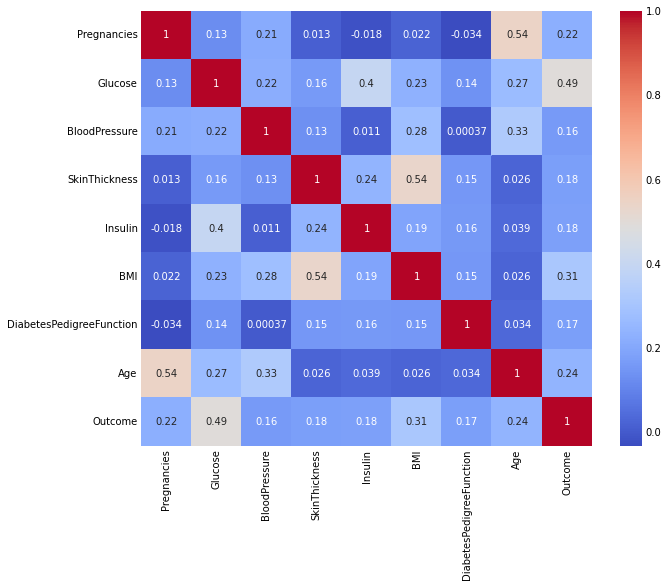

In [10]:
plt.figure(figsize=(9,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Apply VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(df):
  vif = pd.DataFrame()
  vif['variables'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return vif

In [19]:
check_vif(data)

,variables,VIF
0,Pregnancies,3.274890
1,Glucose,21.351046
2,BloodPressure,31.910800
3,SkinThickness,12.518597
4,Insulin,3.307851
5,BMI,32.797700
6,DiabetesPedigreeFunction,3.182662
7,Age,14.249252


### Observations:
In the above results, we remark that many features has a high vif. however BMI feature have the highest vif. Let's remove it and check the result again.

In [20]:
data2 = data.copy()
data2.drop(columns=['BMI'], inplace=True)
data2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,0.627,50
1,1,85.0,66.0,29.000000,79.799479,0.351,31
2,8,183.0,64.0,20.536458,79.799479,0.672,32
3,1,89.0,66.0,23.000000,94.000000,0.167,21
4,0,137.0,40.0,35.000000,168.000000,2.288,33


In [21]:
check_vif(data2)

,variables,VIF
0,Pregnancies,3.274165
1,Glucose,20.330217
2,BloodPressure,23.262885
3,SkinThickness,9.043628
4,Insulin,3.307523
5,DiabetesPedigreeFunction,3.144084
6,Age,14.190110


Let's drop the Blood Pressure feature

In [22]:
data2.drop(columns=['BloodPressure'], inplace=True)
check_vif(data2)

,variables,VIF
0,Pregnancies,3.272026
1,Glucose,14.719254
2,SkinThickness,7.653336
3,Insulin,3.226693
4,DiabetesPedigreeFunction,3.133822
5,Age,12.006381


Let's drop the Glucose feature

In [23]:
data2.drop(columns=['Glucose'], inplace=True)
check_vif(data2)

,variables,VIF
0,Pregnancies,3.262287
1,SkinThickness,6.325012
2,Insulin,2.812988
3,DiabetesPedigreeFunction,3.038767
4,Age,8.296516


## Observation
After dropping successively ['BloodPressure', 'BMI', 'Glucose] features
the vif of other features decreases < 10.

## Combine the correlated variables into one new variable

In [24]:
data2 = data.copy()
check_vif(data2)

,variables,VIF
0,Pregnancies,3.274890
1,Glucose,21.351046
2,BloodPressure,31.910800
3,SkinThickness,12.518597
4,Insulin,3.307851
5,BMI,32.797700
6,DiabetesPedigreeFunction,3.182662
7,Age,14.249252


Let's combine the two highest features BMI and Blood Pressure

In [25]:
data2['BBP'] = data2.apply(lambda x: x['BloodPressure'] * x['BMI'], axis=1)
data2['BBP']

0      2419.2
1      1755.6
2      1491.2
3      1854.6
4      1724.0
        ...  
763    2500.4
764    2576.0
765    1886.4
766    1806.0
767    2128.0
Name: BBP, Length: 768, dtype: float64

In [26]:
data2.drop(columns=['BloodPressure', 'BMI'], inplace=True)
check_vif(data2)

,variables,VIF
0,Pregnancies,3.272597
1,Glucose,16.865427
2,SkinThickness,10.291884
3,Insulin,3.243539
4,DiabetesPedigreeFunction,3.140825
5,Age,12.411649
6,BBP,14.051546


Let's combine Glucose with BBP

In [27]:
data2['gluco_BBP'] = data2.apply(lambda x: x['Glucose'] * x['BBP'], axis=1)
data2.drop(columns=['Glucose', 'BBP'], inplace=True)
check_vif(data2)

,variables,VIF
0,Pregnancies,3.262794
1,SkinThickness,7.718520
2,Insulin,2.983443
3,DiabetesPedigreeFunction,3.069066
4,Age,9.203559
5,gluco_BBP,7.638699


## Observation:
After combining Blood Pressure and BMI in BBP feature, and after combining BBP and Glucose features the VIF of other features decreases < 10

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data2[data2.columns] = scaler.fit_transform(data2[data2.columns])
data2.head()

,Pregnancies,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,gluco_BBP
0,0.639947,0.872057,-0.417768,0.468492,1.425995,0.472418
1,-0.844885,0.248678,-0.417768,-0.365061,-0.190672,-1.075499
2,1.233880,-0.630654,-0.417768,0.604397,-0.105584,-0.158800
3,-0.844885,-0.374700,-0.265107,-0.920763,-1.041549,-0.958129
4,-1.141852,0.872057,0.530423,5.484909,-0.020496,-0.430863


## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data2, target, test_size=0.2,
    random_state=0, stratify=target,
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((614, 6), (614,), (154, 6), (154,))

## Various Families Classification Algorithms

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.metrics import accuracy_score

models = [
          LogisticRegression, KNeighborsClassifier,
          GaussianNB, SVC,  DecisionTreeClassifier,
          RandomForestClassifier, xgboost.XGBClassifier
        ]

for model in models:
  if model == LogisticRegression:
    clf = model(solver='liblinear', multi_class='ovr')
  elif model == RandomForestClassifier:
    clf = model(criterion='entropy')
  else:
    clf = model()
  
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(f'Train Accuracy of {model.__name__}: {clf.score(X_train, y_train) * 100}')
  print(f'Accuracy (Test) Score of {model.__name__}: {clf.score(X_test, y_test)* 100}')
  print(f'Accuracy (Test) Score of {model.__name__}: {accuracy_score(y_test, y_pred) * 100}')
  print()

Train Accuracy of LogisticRegression: 74.5928338762215
Accuracy (Test) Score of LogisticRegression: 75.97402597402598
Accuracy (Test) Score of LogisticRegression: 75.97402597402598

Train Accuracy of KNeighborsClassifier: 78.82736156351791
Accuracy (Test) Score of KNeighborsClassifier: 76.62337662337663
Accuracy (Test) Score of KNeighborsClassifier: 76.62337662337663

Train Accuracy of GaussianNB: 71.9869706840391
Accuracy (Test) Score of GaussianNB: 75.32467532467533
Accuracy (Test) Score of GaussianNB: 75.32467532467533

Train Accuracy of SVC: 78.50162866449512
Accuracy (Test) Score of SVC: 76.62337662337663
Accuracy (Test) Score of SVC: 76.62337662337663

Train Accuracy of DecisionTreeClassifier: 100.0
Accuracy (Test) Score of DecisionTreeClassifier: 74.02597402597402
Accuracy (Test) Score of DecisionTreeClassifier: 74.02597402597402

Train Accuracy of RandomForestClassifier: 100.0
Accuracy (Test) Score of RandomForestClassifier: 78.57142857142857
Accuracy (Test) Score of RandomFore

In [31]:
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred).round(3) * 100
score

79.2

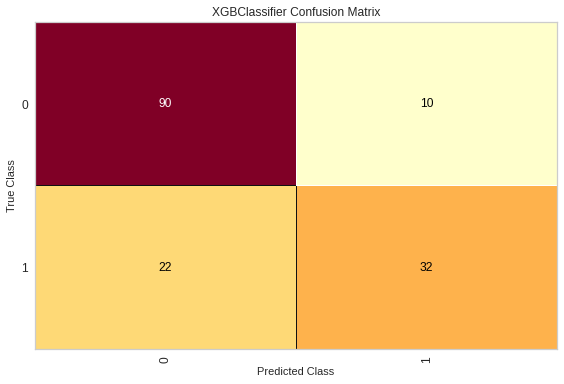

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(model, classes=[0, 1])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof()

In [33]:
matrix = classification_report(y_test, y_pred, digits=4)
print(f'classification Report: \n {matrix}')

classification Report: 
               precision    recall  f1-score   support

           0     0.8036    0.9000    0.8491       100
           1     0.7619    0.5926    0.6667        54

    accuracy                         0.7922       154
   macro avg     0.7827    0.7463    0.7579       154
weighted avg     0.7890    0.7922    0.7851       154



In [34]:
from sklearn.metrics import roc_auc_score

model_roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC_SCORE: {model_roc_auc: .4f}')

AUC_SCORE:  0.7463


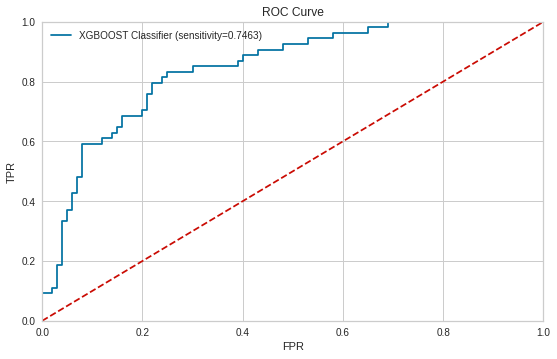

In [35]:
from sklearn.metrics import roc_curve

# predict probabilities
model_pred = model.predict_proba(X_test)
#  positive outcome only
model_probs = model_pred[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, model_probs)

plt.figure()
plt.plot(fpr, tpr, label='XGBOOST Classifier (sensitivity=%0.4f)' % model_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0., 1.])
plt.ylim([0., 1.])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()

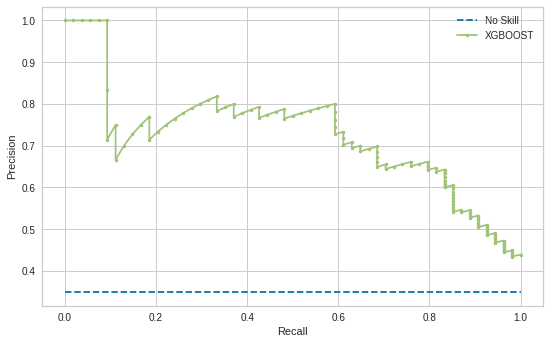

In [36]:
from sklearn.metrics import (
    precision_recall_curve,
    auc,
)

# Calculate the no skill line as the proportion of the positive class
no_skill = len(target[target==1]) / len(target)

# Plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Calculate the model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model_probs)

# Plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='XGBOOST')

# Axes labels
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()